In [17]:
import numpy as np
from matplotlib import pyplot,cm as plt,cm
from scipy.interpolate import *
from ReferenceElement import *
import os
import imageio
from DG_functions_wave_inhomogeneous_with_potential import *

In [18]:
N = 8
K = 10
CF = 2.**(-7)
start = 0.
end = 1.
a1 = 1.
a2 = -1.
alpha = 0.
h = (end-start)/K

In [19]:
reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h

In [20]:
def u_test(x,t):
    return np.sin(2*np.pi*(x-t))
def delta_source(t):
    return 0*t

In [21]:
x = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(x)

In [22]:
t = 0.
t_target = 1.5
dt = CF*dx_min
nt = int((t_target-t)/dt)
print (nt)

38307


In [23]:
u = u_test(x,0)

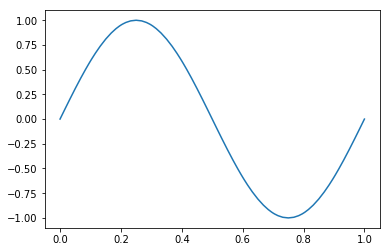

In [24]:
plt.plot(x.flatten(), u.flatten())

In [25]:
direc = "1D_advec_test_4"
if os.path.isdir(direc):
    print('Directory'+direc+'already exists')
else:
    os.makedirs(direc)
images = []

Directory1D_advec_test_4already exists


In [26]:
for n in range(nt):
    u = RK4_Step(dt, DG_du_dt_radiative,u, K, N,t,a2,alpha, M_inv, M_inv_S, delta_source,v= None, potential = None)
    t +=dt
    
    if n%500 ==0:
        plt.figure(figsize=(11, 7), dpi=100)
        for i in range(len(u)):
            plt.plot(x[i],u[i],marker ='o')
        plt.ylabel('u')
        plt.title('t = '+str(np.round(t,3)))
        plt.legend()
        name = direc+"/figure"+str(np.round(t,3))+'.png'
        plt.savefig(name)
        images.append(imageio.imread(name))
        plt.close()
gifName = direc+'/movie.gif'
imageio.mimsave(gifName,images)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

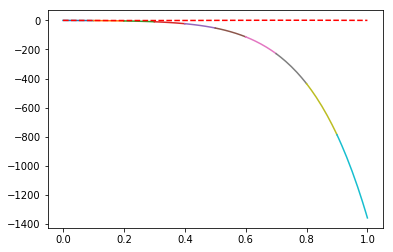

In [27]:
for i in range(len(u)):
    plt.plot(x[i],u[i])
plt.plot(x.flatten(),u_test(x,t).flatten(),color = 'red', linestyle ='--')

In [28]:
gifName = direc+'/movie.gif'
imageio.mimsave(gifName,images)